ロジスティック写像とカオス
===
---

## 1. 準備

### 1.1. import

In [1]:
import numpy as np
import numpy.random as random
import scipy.stats as stats
from ipywidgets import interact
from IPython.core.pylabtools import figsize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2. ロジスティック写像
ロジスティック写像は以下の式で定義される。
$$
x_{n+1} = f(x_n) = ax_n(1-x_n)
$$
ただし、

- $n$: ステップ
- $x_n$: 変数
- $a$: パラメータ

In [2]:
def logistic(a, x):
    """ ロジスティック写像の漸化式
    Inputs:
        a: パラメータ
        x: 変数
    """
    return a * x * (1. - x)

## 2. ロジスティック写像の可視化

### 2.1. グラフ

Text(0,0.5,u'$y$')

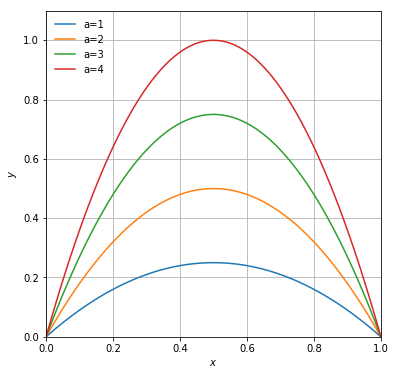

In [3]:
# ロジスティック写像のグラフを確認
figsize(6, 6)
x = np.linspace(0, 1, 100)

for a in range(1, 5):
    y = logistic(a, x)
    plt.plot(x, y, label="a={}".format(a))

plt.grid()
plt.legend(loc="upper left", frameon=False)
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.1))
plt.xlabel("$x$")
plt.ylabel("$y$")

### 2.2. Poincaré plot
[Poincaré plot - Wikipedia](https://en.wikipedia.org/wiki/Poincar%C3%A9_plot)
3step間の変換を3Dプロットしてみる

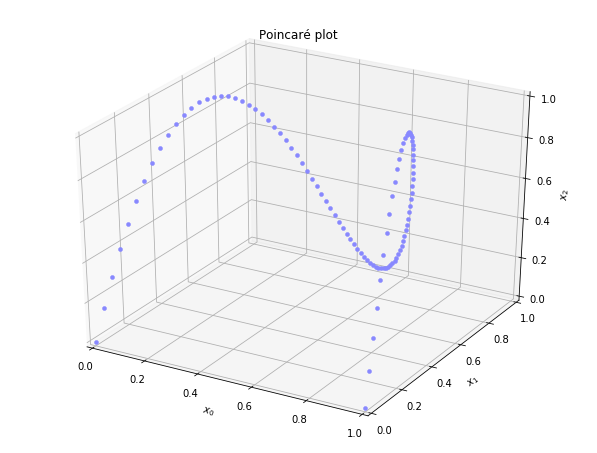

In [4]:
# Poincaré plot
x0 = np.linspace(0, 1, 100)
x1 = logistic(4, x0)
x2 = logistic(4, x1)

# 3D scatter
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
plt.title(u"Poincaré plot")

ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$x_2$")

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_zlim(0.0, 1.0)

ax.plot(x0, x1, x2, "o", color="#8888ff", ms=4, mew=0.5)
plt.show()

## 3. 時間発展
### 3.1. $x_n$の時間発展
ステップ$n$による$x_n$の変化

In [5]:
figsize(12, 6)

# パラメータaと初期値x0をJupyter Notebook上でインタラクティブに操作できるようにする
@interact(a=(0.0, 4.0), x0=(0.0, 1.0))
def plot_logistic(a=3.6, x0=0.5):
    """ ロジスティック写像による変数xの時間発展 """
    max_step = 100  # 最大step
    x_trace = np.zeros(max_step)  # 各stepのx
    x = x_trace[0] = x0  # 初期値

    for step in xrange(1, max_step):
        x = logistic(a, x)
        x_trace[step] = x

    # plot
    plt.plot(x_trace)
    plt.grid()
    plt.legend(loc="upper left", frameon=False)
    plt.xlim((0, max_step))
    plt.ylim((0.0, 1.1))
    plt.xlabel("$n$")
    plt.ylabel("$x_n$")

interactive(children=(FloatSlider(value=3.6, description=u'a', max=4.0), FloatSlider(value=0.5, description=u'x0', max=1.0), Output()), _dom_classes=('widget-interact',))

aの値によって挙動が変わる。例を一覧にしてプロットする。

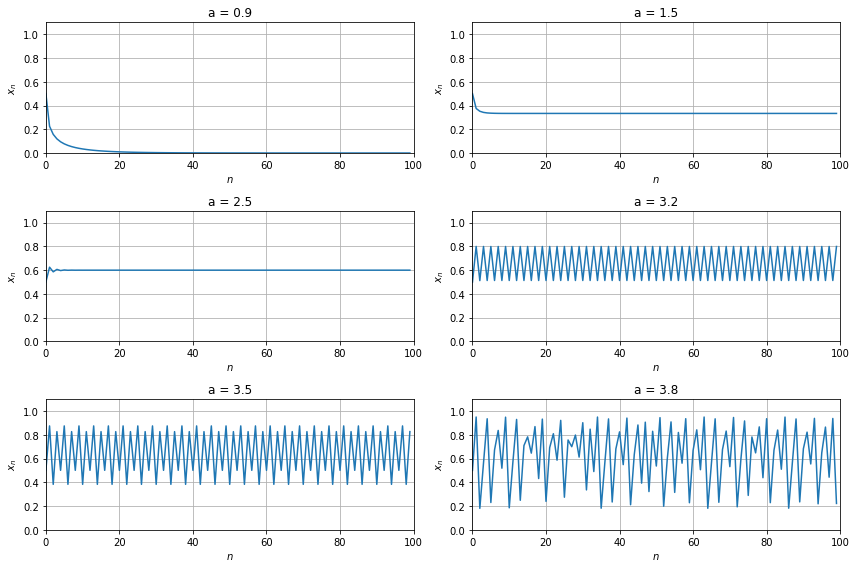

In [6]:
a_list = [0.9, 1.5, 2.5, 3.2, 3.5, 3.8]

fig = plt.figure(figsize=(12, 8))
for i, a in enumerate(a_list):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title("a = {}".format(a))
    plot_logistic(a, 0.5)
fig.tight_layout()  # 軸ラベルとタイトルの重なりを防ぐ

### 3.2. クモの巣図法
[クモの巣図法 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%AF%E3%83%A2%E3%81%AE%E5%B7%A3%E5%9B%B3%E6%B3%95)

In [7]:
figsize(6, 6)

@interact(a=(0.0, 4.0), x0=(0.0, 1.0))
def plot_cobweb(a=3.6, x0=0.5):
    # y = x と y = f(x) をプロット
    x_ = np.linspace(0, 1, 100)
    y_ = logistic(a, x_)
    plt.plot(x_, x_, color="k")  # y = x
    plt.plot(x_, y_, color="k")  # y = f(x)

    # x_nの時間発展とクモの巣図法
    max_step = 50  # 最大step
    x_trace = np.zeros(max_step)  # 各stepのx
    x = x_trace[0] = x0  # 初期値

    for step in xrange(1, max_step):
        x = logistic(a, x)
        x_trace[step] = x
        # クモの巣描画
        if step == 1:
            plt.plot((x_trace[0], x_trace[0]), (0, x_trace[1]), '-', lw=1, color="#8888ff")  # 横軸から垂直
        else:
            plt.plot((x_trace[step-1], x_trace[step-1]), (x_trace[step-1], x_trace[step]), '-', lw=1, color="#8888ff") # y = x から垂直
        plt.plot((x_trace[step-1], x_trace[step]), (x_trace[step], x_trace[step]), '-', lw=1, color="#8888ff")  # 水平

    plt.grid()
    plt.xlim((0.0, 1.0))
    plt.ylim((0.0, 1.1))
    plt.xlabel("$x$")
    plt.ylabel("$y$")

interactive(children=(FloatSlider(value=3.6, description=u'a', max=4.0), FloatSlider(value=0.5, description=u'x0', max=1.0), Output()), _dom_classes=('widget-interact',))

In [8]:
# TODO: 周期倍分岐